In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [2]:
# Loading the dataset
data = pd.read_csv("Language Detection.csv")

In [3]:
# value count for each language
data["Language"].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [4]:
# separating the independent and dependant features
X = data["Text"]
y = data["Language"]

In [5]:
# converting categorical variables to numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [6]:
# creating a list for appending the preprocessed text
data_list = []

In [7]:
# iterating through all the text
for text in X:
    # removing the symbols and numbers
    text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    # converting the text to lower case
    text = text.lower()
    # appending to data_list
    data_list.append(text)

In [8]:
# creating bag of words using countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()

In [9]:
#train test splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [10]:
#model creation and prediction
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [11]:
# prediction 
y_pred = model.predict(x_test)

In [12]:
# model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

<Figure size 1800x1600 with 0 Axes>

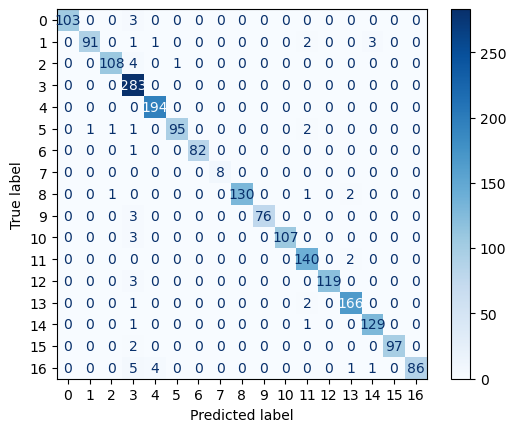

In [13]:
x = ConfusionMatrixDisplay(cm)
plt.figure(figsize=(18, 16))
x.plot(cmap='Blues', values_format='d')
# plt.show()

In [14]:
# # visualising the confusion matrix
# plt.figure(figsize=(15,10))
# sns.heatmap(cm, annot = True)
# plt.show()

In [15]:
# function for predicting language
def prediction(text):
    x = cv.transform([text]).toarray()
    lang = model.predict(x)
    lang = le.inverse_transform(lang)
    print("The langauge is in",lang[0])

In [16]:
# English
prediction("MS Dhoni is my favorite cricketer")
# French
prediction("MS Dhoni est mon joueur de cricket préféré")
# Arabic
prediction("MS Dhoni هو لاعب الكريكيت المفضل لدي")
# Spanish
prediction("MS Dhoni es mi jugador de críquet favorito")
# Malayalam
prediction("എംഎസ് ധോണി എൻ്റെ പ്രിയപ്പെട്ട ക്രിക്കറ്റ് താരമാണ്")
# Russian
prediction("Мс Дхони — мой любимый игрок в крикет.")

The langauge is in English
The langauge is in French
The langauge is in Arabic
The langauge is in Spanish
The langauge is in Malayalam
The langauge is in Russian


In [21]:
prediction("MS Dhoni ist mein Lieblingskricketspieler")

The langauge is in German


In [20]:
prediction("Привет! Как дела? Вечером идем в кино. Погода отличная сегодня.")

The langauge is in Russian
